In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#importing required modules

In [3]:
data = pd.read_csv("Housing.xls")
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
labels = data.keys()
print(labels)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [5]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
data.isnull().sum()
#isnull() returns true if value is empty, else false
#sum() returns the sum of all the values column wise this will show how many non existing values are there in the given dataset

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

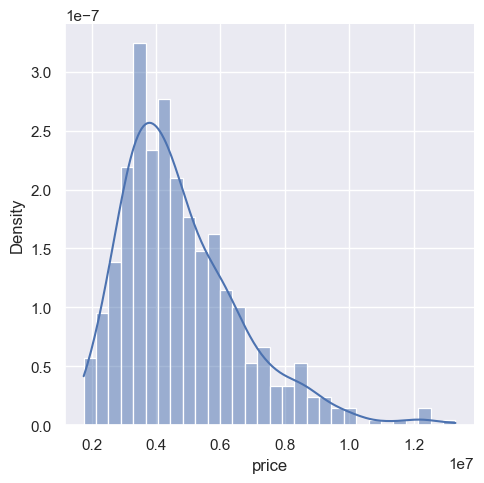

In [7]:
sns.set_theme(rc = {'figure.figsize':(11.7,8.27)})
sns.displot(x = data['price'],bins=30, stat = 'density',kde=True)
plt.show()

#understanding the code, set_theme is used to change the properties of the generated plot, rc is parameter mapping to change the defaults stored in sns
#displot is used to show in distribution of data
#kde converts the sharp histogram into smooth line to show distribution, kde is just a function that shows the data 
#plt.show() prints the figure we asked for

<AxesSubplot: >

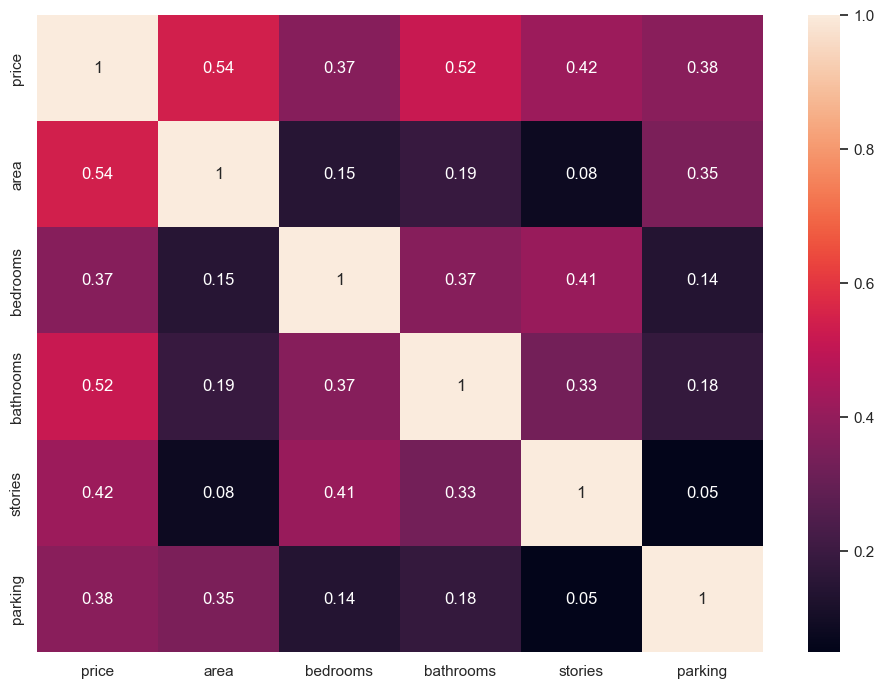

In [8]:
correlation_matrix = data.corr(numeric_only=True).round(2)
sns.heatmap(data=correlation_matrix, annot=True)

#data.corr() computes the corelation between two columns .round(2) rounds of the decimal to 2 values
#data.corr() returns a correlation matrix as a dataframe
#sns.heatmap plots a colour coded matrix with the index and columns from the provided matrix
#annot = True prints the value inside the cells
#if the value is nearer to 1 there is a strong possitive correlation, if it is much nearer to -1 there is a strong negative correlation 



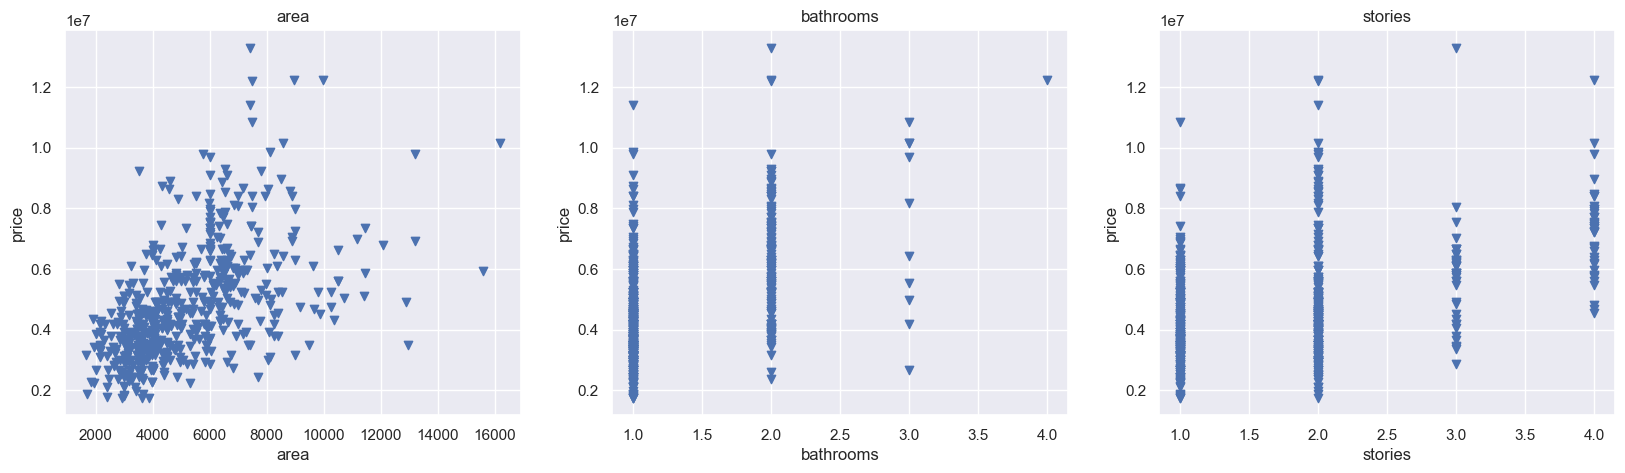

In [9]:
plt.figure(figsize = (20,5))
features = ['area','bathrooms','stories']
label = data['price']

for i,col in enumerate(features):
    plt.subplot(1,len(features),i+1)#subplot allows you to draw multiple plots in a single plot
    x = data[col]
    y = label
    plt.scatter(x,y,marker='v')#mark tells us what design of the merker that marks the value, v is used for down facring triangle
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('price')
    
    




In [52]:
X = pd.DataFrame(np.c_[data['area'],data['bathrooms'],data['stories']],columns = ['area','bathroom','stories'])

#c_ method concatenates the single array column vectors columnwise into 2-d arrays, columns attribute is used to name the columns
Y = np.array(data['price'])

In [51]:
from sklearn.preprocessing import StandardScaler
#normalizing the data so that it is much more accurate
scaler = StandardScaler()
X = scaler.fit_transform(X)
X


array([[ 1.04672629,  1.42181174,  1.37821692],
       [ 1.75700953,  5.40580863,  2.53202371],
       [ 2.21823241,  1.42181174,  0.22441013],
       ...,
       [-0.70592066, -0.57018671, -0.92939666],
       [-1.03338891, -0.57018671, -0.92939666],
       [-0.5998394 , -0.57018671,  0.22441013]])

In [35]:
class mulvar_lr():
    """implementation of a class to tackle multi variable linear regression"""
    def __init__(self) -> None:
        pass
        
        
    def fit_model(self,X,Y,learning_rate = 0.0001, epsilon = 0.1):
        """a method to fit the data into the model and train it, epsilon is the error threshhold, which will 
        stop the function once the error is lesser than epsilon the model has successfully converged"""
        X = np.c_[X,np.ones(len(X))]
        
#adding the row of ones to take into account the bias during matrix mul
        weights = np.ones(X.shape[1])#x.shape[1] represents the number of rows in the given array
        norma = 1
        while (norma>epsilon):
            #computes the partial derivative
            y_pred = X @ weights.T
            partial_diff = X.T @ (Y-y_pred)
            #norma is the distance(magnitude) of the gradient, when the norma is less than a particular error the iteration stops
            norma = np.sum(np.sqrt(np.square(partial_diff)))
            weights = weights.T - (learning_rate*partial_diff)
            if np.isnan(norma):
               print("the model diverged use smaller learning rate")
        return weights
    
    def predict(self,w,x):
        """input: the input is the features as an nd array"""
        """output: output will be an ndarray of the predicted values"""
        
        return w[:-1] @ np.array(x).T + w[-1]
    
    
            
        



In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=5)

In [53]:
lr = mulvar_lr()
w = lr.fit_model(x_train,y_train)
y_pred = lr.predict(w,x_test)

the model diverged use smaller learning rate


C:\Users\viphe\AppData\Local\Temp\ipykernel_4156\2270451402.py:20: RuntimeWarning: overflow encountered in square
  norma = np.sum(np.sqrt(np.square(partial_diff)))
C:\Users\viphe\AppData\Local\Temp\ipykernel_4156\2270451402.py:18: RuntimeWarning: overflow encountered in matmul
  partial_diff = X.T @ (Y-y_pred)
C:\Users\viphe\AppData\Local\Temp\ipykernel_4156\2270451402.py:18: RuntimeWarning: invalid value encountered in matmul
  partial_diff = X.T @ (Y-y_pred)


In [57]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import SGDRegressor
#sgdregressor a schotratic gradient descent regressor 
sgdr = SGDRegressor(max_iter= 1000)
sgdr.fit(x_train,y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weights updated: {sgdr.t_}, the parameters is {sgdr.get_params()}")


SGDRegressor()
number of iterations completed: 28, number of weights updated: 11425.0, the parameters is {'alpha': 0.0001, 'average': False, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.01, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'invscaling', 'loss': 'squared_error', 'max_iter': 1000, 'n_iter_no_change': 5, 'penalty': 'l2', 'power_t': 0.25, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [58]:
b_sgdr = sgdr.intercept_
w_sgdr = sgdr.coef_
y_pred_sgdr = sgdr.predict(x_test)

In [59]:
print(r2_score(y_test,y_pred_sgdr))#r2_score is an accuracy measuring method which tells us how much of the variance is
#explained by the model , for example a 

0.4877290095253385


In [23]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)
y_train_predict = lr_model.predict(x_test)


In [24]:


print(r2_score(y_test,y_train_predict))

0.48716354206142354
